In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import block_diag

In [3]:
def simulate_beta(x_vals,n_samps,n_samps_control,beta_true,sigma=1,seed_number=None):
    n_x = len(x_vals)
    means = beta_true*x_vals
    if seed_number is not None:
        np.random.seed(seed_number)

    samples = sigma*np.random.normal(size = (n_samps,n_x))+means
    control = 5*sigma*np.random.normal(size = n_samps_control)

    estimates = np.mean(samples,axis=0) - np.mean(control)

    cov = np.diag(np.ones(n_x) * 1/n_samps)
    corr_part = np.ones(n_x)/n_samps_control
    cov = cov + np.outer(corr_part,corr_part)
    beta = (x_vals.T@np.linalg.inv(cov)@estimates)/(x_vals.T@np.linalg.inv(cov)@x_vals)
    beta_bad = (x_vals.T@estimates)/(x_vals.T@x_vals)
    return beta,beta_bad, estimates, cov

In [4]:
x_vals = np.linspace(0.2,3,4)
n_samps_control = 2
n_samps = 10
beta_true = 1

results = np.array([simulate_beta(x_vals,n_samps=n_samps,n_samps_control=n_samps_control,beta_true=beta_true)[:2] for _ in range(5000)])

In [5]:
x_vals

array([0.2       , 1.13333333, 2.06666667, 3.        ])

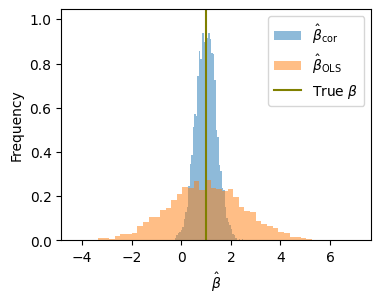

[0.16864   2.4132782]
[0.9999218  0.99617054]


In [7]:
plt.figure(figsize=(4,3))
plt.hist(results[:,0],50,alpha = 0.5,density=True,label=r"$\hat\beta_{\mathrm{cor}}$")
plt.hist(results[:,1],50,alpha = 0.5,density=True,label=r"$\hat\beta_{\mathrm{OLS}}$")
plt.axvline(x = 1, color = 'olive', label = r'True $\beta$')
plt.xlabel(r"$\hat \beta$")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("images/distribution_plot.pdf",bbox_inches="tight",pad_inches=0.1)
plt.show()
print(np.var(results,axis=0))
print(np.mean(results,axis=0))

7.03588895702083


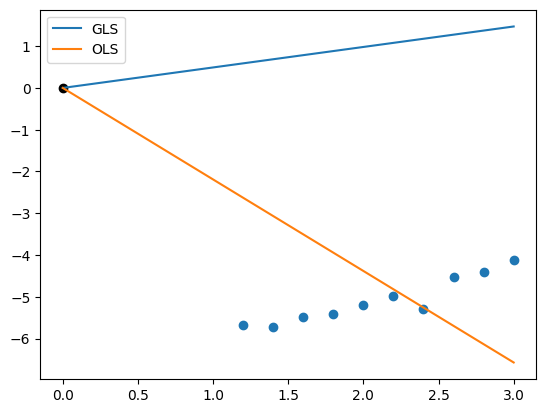

In [5]:
x_vals = np.linspace(1.2,3,10)
n_samps_control = 1
n_samps = 10
beta_true = 1
np.random.seed(31)
n_x = len(x_vals)
means = beta_true*x_vals
sigma = 1

samples = sigma*np.random.normal(size = (n_samps,n_x))+means
control = 5*sigma*np.random.normal(size = n_samps_control)

estimates = np.mean(samples,axis=0) - np.mean(control)

cov = np.diag(np.ones(n_x) * 1/n_samps)
corr_part = np.ones(n_x)/n_samps_control
cov = cov + np.outer(corr_part,corr_part)
beta = (x_vals.T@np.linalg.inv(cov)@estimates)/(x_vals.T@np.linalg.inv(cov)@x_vals)
beta_bad = (x_vals.T@estimates)/(x_vals.T@x_vals)
plt.scatter(x_vals,estimates)
x_valsp = np.hstack([0,x_vals])

plt.plot(x_valsp,beta*x_valsp,label = 'GLS')
plt.plot(x_valsp,beta_bad*x_valsp,label = "OLS")
plt.scatter(0,0,c = 'black')
plt.legend()
plt.savefig("images/regression_out.pdf")
print(np.mean(np.mean(control)))

In [32]:
beta

0.4903458094677436

In [33]:
beta_bad

-2.1907599458000346

In [34]:
x_vals_1 = np.linspace(1.2,4.4,12)
n_samps_control = 2
n_samps = 30
beta_true = 1

b_1, bb_1, est_1, cov_1 = simulate_beta(x_vals_1,n_samps=n_samps,n_samps_control=n_samps_control,beta_true=beta_true,seed_number=31)

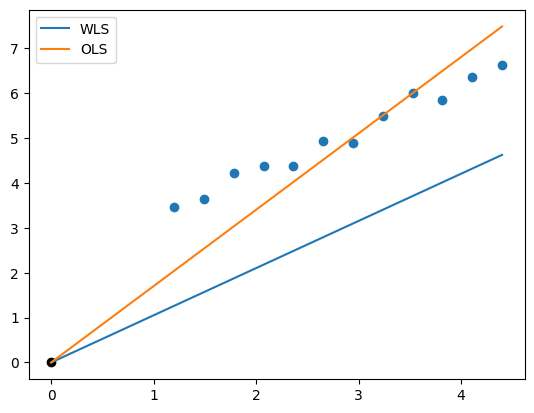

In [35]:
plt.scatter(x_vals_1,est_1)
x_vals_1p = np.hstack([0,x_vals_1])

plt.plot(x_vals_1p,b_1*x_vals_1p,label = 'WLS')
plt.plot(x_vals_1p,bb_1*x_vals_1p,label = "OLS")
plt.scatter(0,0,c = 'black')
plt.legend()

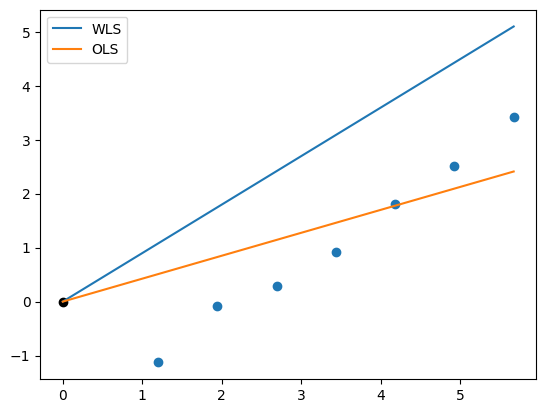

In [36]:
x_vals_2 = np.linspace(1.2,5.67,7)
n_samps_control = 3
n_samps = 50
beta_true = 1

b_2, bb_2, est_2, cov_2 = simulate_beta(x_vals_2,n_samps=n_samps,n_samps_control=n_samps_control,beta_true=beta_true,seed_number=31)

plt.scatter(x_vals_2,est_2)
x_vals_2p = np.hstack([0,x_vals_2])

plt.plot(x_vals_2p,b_2*x_vals_2p,label = 'WLS')
plt.plot(x_vals_2p,bb_2*x_vals_2p,label = "OLS")
plt.scatter(0,0,c = 'black')
plt.legend()

#### Weighted least squares of all studies vs OLS

In [37]:
x = np.vstack([x_vals.reshape(-1,1),x_vals_1.reshape(-1,1),x_vals_2.reshape(-1,1)])
est = np.vstack([estimates.reshape(-1,1),est_1.reshape(-1,1),est_2.reshape(-1,1)])
covariance = block_diag(cov,cov_1,cov_2)
inv_covariance = np.linalg.inv(covariance)

In [38]:
betaS = ((x.T@inv_covariance@est) / (x.T@inv_covariance@x))[0][0]

In [39]:
betaS

0.9332127566764724

In [40]:
betaB = ((x.T@est) / (x.T@x))[0][0]

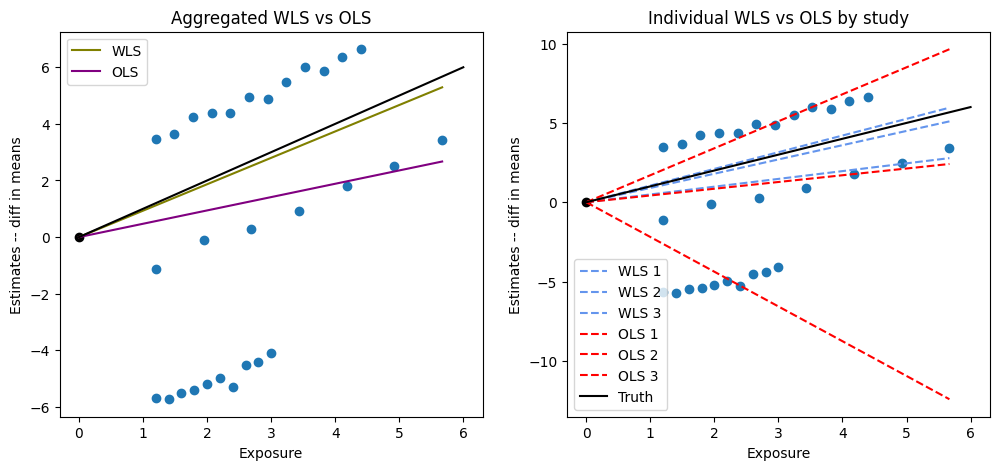

In [49]:
x_points = np.array([0,6])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x,est)
xp = np.hstack([0,np.max(x.flatten())])

plt.plot(xp,betaS*xp,label = 'WLS',c="olive")
plt.plot(xp,betaB*xp,label = "OLS",c="purple")
plt.scatter(0,0,c = 'black')
plt.title("Aggregated WLS vs OLS")
plt.xlabel("Exposure")
plt.ylabel("Estimates -- diff in means")
plt.plot([0,6],[0,6],c = 'black')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(x,est)

plt.plot(xp,beta*xp, label="WLS 1",linestyle="dashed",c="cornflowerblue")
plt.plot(xp,b_1*xp, label="WLS 2",linestyle="dashed",c="cornflowerblue")
plt.plot(xp,b_2*xp, label="WLS 3",linestyle="dashed",c="cornflowerblue")
plt.plot(xp,beta_bad*xp, label="OLS 1",linestyle="dashed",c="red")
plt.plot(xp,bb_1*xp, label="OLS 2",linestyle="dashed",c="red")
plt.plot(xp,bb_2*xp, label="OLS 3",linestyle="dashed",c="red")
plt.scatter(0,0,c = 'black')
plt.title("Individual WLS vs OLS by study")
plt.xlabel("Exposure")
plt.ylabel("Estimates -- diff in means")
plt.plot([0,6],[0,6],c = 'black',label="Truth")
plt.legend()
plt.show()

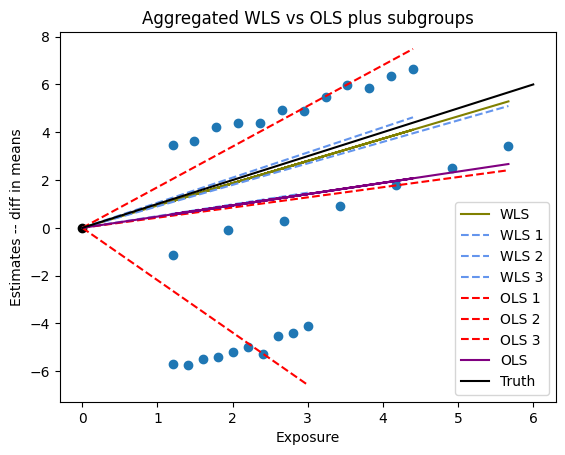